### Exp2 analysis 

In [1]:
#Importing packages 
import pandas as pd 
import numpy as np
import os 
import glob
import re
import seaborn as sns
import matplotlib.pyplot as plt
import umap
import statsmodels.formula.api as smf
from scipy import stats
from scipy.stats import mstats
import dask.dataframe as dd
sns.set_style("ticks")

myColors = ["#7400b8","#6930c3","#5e60ce","#5390d9","#4ea8de","#48bfe3","#56cfe1","#64dfdf","#72efdd","#80ffdb"]

/Users/valdemaras/Programs/miniconda/miniconda3/lib/python3.9/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [10]:
#Importing data 
#MS2 IT optimization
df2 = pd.read_csv("data/Exp2/Exp2_DDM_250pg.csv",sep = "\t",  thousands =".") 
#Extracting the required information from the file name
df2['Load'] =  '250pg'
df2['IT'] =  df2.iloc[:,0].str.extract(r'100ms_(.*?)_')[0].values
df2['Window'] =  df2.iloc[:,0].str.extract(r'msIT_(.*?)_')[0].values


#MS1 IT optimization
df3 = pd.read_csv("data/Exp2/ms1_250pg_stats.csv",sep = "\t",  thousands =".") 
#Extracting the required information from the file name
df3['Load'] =  '250pg'
df3['IT'] =  df3.iloc[:,0].str.extract(r'240k_(.*?)_')[0].values
#df3['Window'] =  df2.iloc[:,0].str.extract(r'msIT_(.*?)_')[0].values

#Single-cell method optimization
df4 = pd.read_csv("data/Exp2/sc_method_stats.csv",sep = "\t",  thousands =".") 
#Extracting the required information from the file name

df4['MS1'] =  df4.iloc[:,0].str.extract(r'method\\(.*?)_')[0].values
df4['MS2'] =  df4.iloc[:,0].str.extract(r'ms_(.*?)\\')[0].values

[Text(0.5, 1.0, '250pg')]

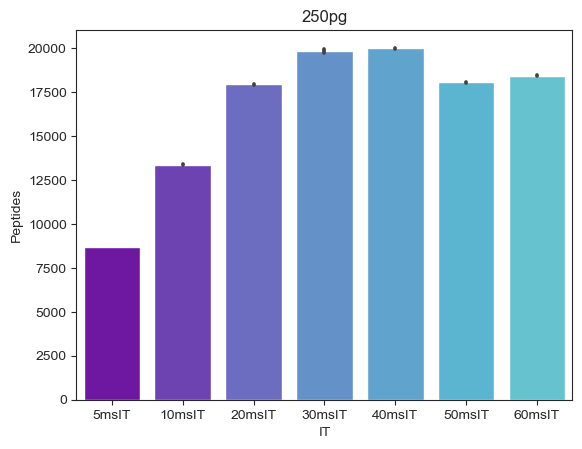

In [12]:
myOrder = ['5msIT', '10msIT', '20msIT', '30msIT', '40msIT', '50msIT', '60msIT']
sns.barplot(data = df2, x = "IT", y = "Peptides", palette = myColors, order=myOrder).set(title="250pg")

[Text(0.5, 1.0, '200ms')]

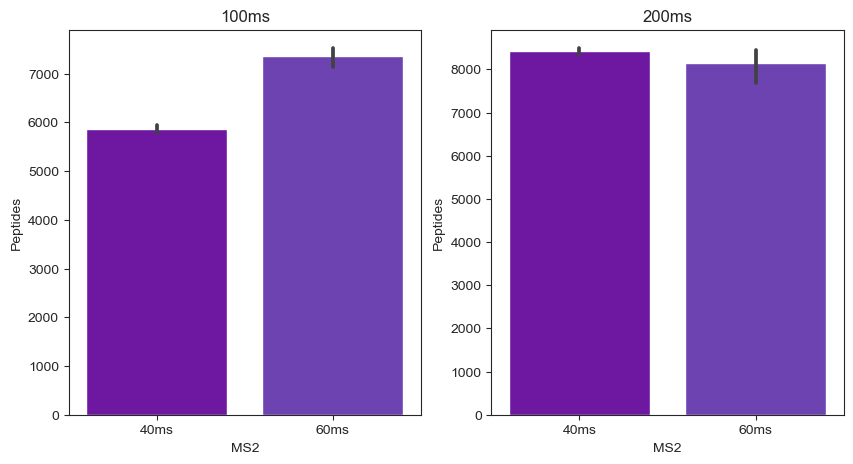

In [13]:
fig, axes = plt.subplots(1,2, figsize=(10, 5))
sns.barplot(data = df4[df4.MS1 == "100ms"], x = "MS2", y = "Peptides", ax = axes[0], palette = myColors).set(title="100ms")
sns.barplot(data = df4[df4.MS1 == "200ms"], x = "MS2", y = "Peptides", ax = axes[1], palette = myColors).set(title="200ms")

In [15]:
df2.to_csv("data/Exp2/output/coverage_ddm.txt", sep = "\t", index = False)
df3.to_csv("data/Exp2/output/ms1_250pg.txt", sep = "\t", index = False)
df4.to_csv("data/Exp2/output/sc_method.txt", sep = "\t", index = False)